# Análisis de Regressión para determinar el precio de venta en los suburbios de Boston

La información de análisis esta compuesta por 506 registros de casas en los suburbios de Bostos, y 14 variables con sus caracteristicas, estas son:

1. Variable respuesta medv = median value of owner-occupied homes in 1000USD.
2. crim = per capita crime rate by town.
3. zn = proportion of residential land zoned for lots over 25,000 sq.ft.
4. indus = proportion of non-retail business acres per town.
5. chas = Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
6. nox = nitrogen oxides concentration (parts per 10 million).
7. rm = average number of rooms per dwelling.
8. age = proportion of owner-occupied units built prior to 1940.
9. dis = weighted mean of distances to five Boston employment centres.
10. rad = index of accessibility to radial highways.
11. tax = full-value property-tax rate per 10,000USD.
12. ptratio = pupil-teacher ratio by town.
13. black = 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
14. lstat = lower status of the population (percent).


## Pasos de análisis
1. Importar paquetes de trabajo
2. Lectura de datos sklearn
3. Análisis descriptivo de los datos explicativos y selección de variables
4. División de datos en Trainning y Test
5. Crear modelo con API
6. Calibrar epochs y data de validación
7. Graficar historia de ajuste y validación
8. Procentaje de precisión obtenido
9. Graficar residuales


#### Paso 1. Importar paquetes de trabajo

In [1]:
!pip install tensorflow
!pip install keras
!pip install pydot
!pip install graphviz
!pip install pydotplus
import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
from tensorflow.keras.utils import plot_model

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print("Versión de Tensorflow:", tf.__version__)

Versión de Tensorflow: 2.4.1


#### Paso 2. Lectura de datos sklearn

In [2]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

(506, 13)
(506,)


#### Paso 3. Análisis descriptivo de los datos explicativos y eliminación de variables

In [3]:
columns_names=['crim','zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio','black', 'lstat']
dfBostonX = pd.DataFrame(X, columns=columns_names)
dfBostonX.describe(include='all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [4]:
dfBostonX=dfBostonX[['crim','zn', 'indus','nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio','black', 'lstat']]

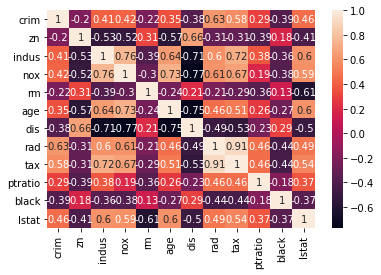

In [5]:
corrMatrix=dfBostonX.corr()
sb.heatmap(corrMatrix, annot=True)
plt.show()

In [6]:
columns_names=['medv']
dfBostonY = pd.DataFrame(y, columns=columns_names)
dfBostonY.describe(include='all')

,medv
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


#### Paso 4. División de datos en Trainning y Test, y Normalización

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(dfBostonX, dfBostonY, test_size=0.30, random_state=0)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train.shape

(354, 12)

In [9]:
X_test.shape

(152, 12)

In [10]:
Y_train.shape

(354, 1)

In [11]:
Y_test.shape

(152, 1)

#### Paso 5. Crear modelo con API

In [12]:
class Regression(Model):
    def __init__(self):
        super(Regression,self).__init__()
        self.dense1 = Dense(128, activation='linear')
        self.dropout1 = Dropout(0.4)
        self.dense2 = Dense(128, activation='elu')
        self.dropout2 = Dropout(0.4)
        self.dense_out = Dense(1)
        

    def call(self,x):
        x = self.dense1(x)
        x = self.dropout1(x)
        x = self.dense2(x)
        x = self.dropout2(x)
        return(self.dense_out(x))

model = Regression()

optimizer = tf.keras.optimizers.Adam()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

#### Paso 6. Calibrar epochs y data de validación

In [13]:
class PrintLine(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
epochs = 1100
history = model.fit(
  X_train, Y_train,
  epochs=epochs, validation_split = 0.15, verbose=0,
  callbacks=[PrintLine()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Model: "regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1664      
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  129       
Total params: 18,305
Trainable params: 18,305
Non-trainable params: 0
_________________________________________________________________


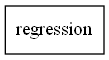

In [14]:
model.summary()
plot_model(model, to_file='../Boston_model.png', show_shapes=True)

#### Paso 7. Graficar historia de ajuste y validación

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1095,10.238121,2.509548,10.238121,5.448745,1.712200,5.448745,1095
1096,11.785737,2.623826,11.785737,5.461597,1.726304,5.461597,1096
1097,10.677272,2.513429,10.677272,5.526305,1.746031,5.526305,1097
1098,11.579869,2.524764,11.579869,6.027284,1.783641,6.027284,1098
1099,12.534715,2.657691,12.534715,5.781046,1.797505,5.781046,1099


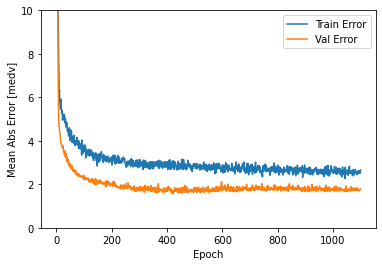

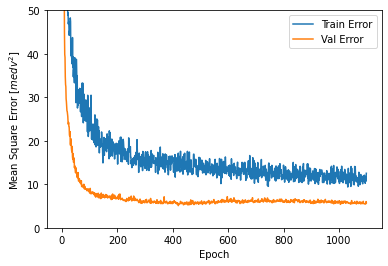

In [16]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [medv]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,10])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$medv^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,50])
  plt.legend()
  plt.show()

plot_history(history)

#### Paso 8. Procentaje de precisión obtenido

In [17]:
loss, mae, mse = model.evaluate(X_test, Y_test, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} medv".format(mae))

5/5 - 0s - loss: 15.9380 - mae: 2.5895 - mse: 15.9380
Testing set Mean Abs Error:  2.59 medv


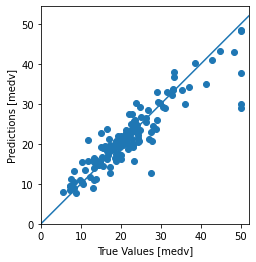

In [18]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(Y_test, test_predictions)
plt.xlabel('True Values [medv]')
plt.ylabel('Predictions [medv]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

#### Paso 9. Graficar residuales

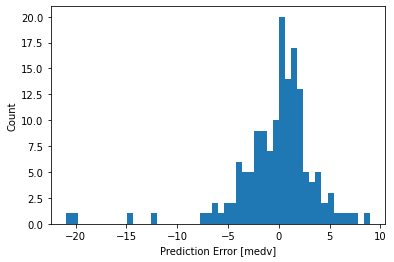

In [19]:
test_predictions=test_predictions.reshape(152,1)
error = test_predictions - Y_test
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [medv]")
_=plt.ylabel("Count")